<a href="https://colab.research.google.com/github/ANKITPODDER2000/TensorflowDoc/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("Version of tensorflow is : ",tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
from random import randint
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
(train_data , train_label) , (test_data , test_label) = tf.keras.datasets.fashion_mnist.load_data()

print("No of training data points : %d"%( train_data.shape[0]))
print("Sahpe of train_data : " , train_data.shape)
print("Sahpe of train_label : " , train_label.shape)
print("\n====================================\n")
print("No of testing data points : %d"%( test_data.shape[0]))
print("Sahpe of test_data : " , test_data.shape)
print("Sahpe of test_label : " , test_label.shape)

4423680/4422102 [==============================] - 0s 0us/step
No of training data points : 60000
Sahpe of train_data :  (60000, 28, 28)
Sahpe of train_label :  (60000,)


No of testing data points : 10000
Sahpe of test_data :  (10000, 28, 28)
Sahpe of test_label :  (10000,)


In [3]:
train_label = tf.keras.utils.to_categorical(train_label)
test_label = tf.keras.utils.to_categorical(test_label)

In [4]:
print("No of training data points : %d"%( train_data.shape[0]))
print("Sahpe of train_data : " , train_data.shape)
print("Sahpe of train_label : " , train_label.shape)
print("\n====================================\n")
print("No of testing data points : %d"%( test_data.shape[0]))
print("Sahpe of test_data : " , test_data.shape)
print("Sahpe of test_label : " , test_label.shape)

No of training data points : 60000
Sahpe of train_data :  (60000, 28, 28)
Sahpe of train_label :  (60000, 10)


No of testing data points : 10000
Sahpe of test_data :  (10000, 28, 28)
Sahpe of test_label :  (10000, 10)


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

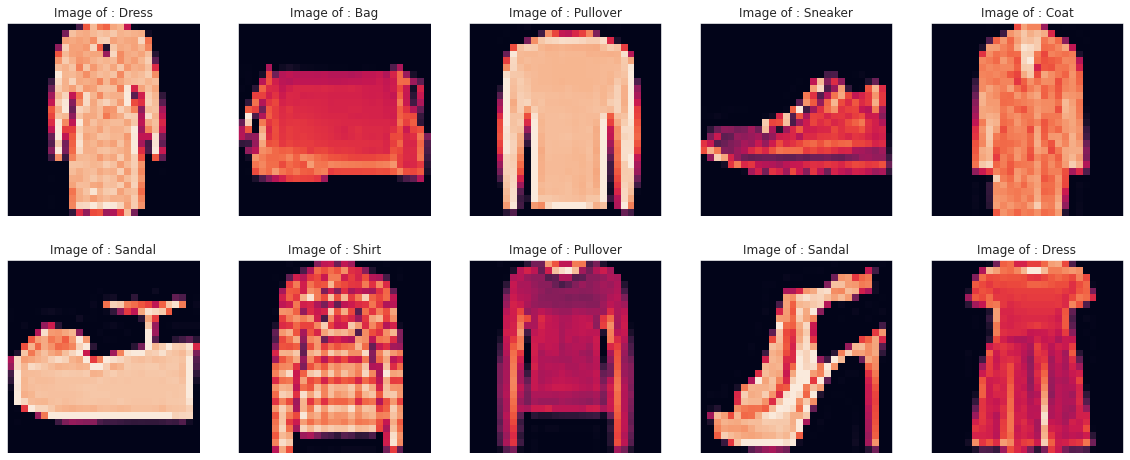

In [16]:
_ , ax = plt.subplots(2,5,figsize = (20,8))
for i in range(2):
    for j in range(5):
        img_index = randint(0,60000)
        ax[i,j].imshow(train_data[img_index , : , :])
        ax[i,j].set_title("Image of : %s"%(class_names[train_label[img_index].argmax()]))
        ax[i,j].grid(False)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

In [60]:
train_data = train_data / 255
test_data  = test_data / 255

In [61]:
def get_model(CONV , LAYER , i_shape = (28,28)):
    if len(CONV) != 0:
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Conv2D(CONV[0] , (3,3) , activation = "relu" , input_shape = i_shape))
        model.add(tf.keras.layers.MaxPool2D((2,2)))
        for i in CONV[1:]:
            model.add(tf.keras.layers.Conv2D(i , (3,3) , activation = "relu"))
            model.add(tf.keras.layers.MaxPool2D((2,2)))
        model.add(tf.keras.layers.Flatten())
        for l in LAYER:
            model.add(tf.keras.layers.Dense(l , activation = "relu"))
        model.add(tf.keras.layers.Dense(10 , activation = "softmax"))
        model.compile(optimizer = 'rmsprop' , loss = tf.keras.losses.categorical_crossentropy , metrics = ['acc'])
        return model
    
    else:
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Flatten(input_shape = i_shape))
        for l in LAYER:
            model.add(tf.keras.layers.Dense(l , activation = "relu"))
        model.add(tf.keras.layers.Dense(10 , activation = "softmax"))
        
        model.compile(optimizer = 'rmsprop' , loss = tf.keras.losses.categorical_crossentropy , metrics = ['acc'])
        return model

In [62]:
class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self , epoch , logs = {}):
        if epoch%10 == 0:
            print("Epoch %3d -> Acc : %.6f  ||  Val_Acc : %.6f"%(epoch , logs['acc'] , logs['val_acc']))
        if logs['acc'] > 0.99:
            print("Get 99% acc on %d epoch"%epoch)

In [63]:
model1 = get_model([] , [256 , 256] )
#model1.summary()
cl = MyCallBack
his1 = model1.fit(train_data , train_label ,
                  batch_size = 128 ,
                  steps_per_epoch = train_data.shape[0] // 128 ,
                  epochs = 200,
                  validation_data = (test_data , test_label ) ,
                  validation_batch_size = 128 ,
                  validation_steps = test_data.shape[0] // 128,
                  callbacks = [cl()],
                  verbose = 0)

Epoch   0 -> Acc : 0.801282  ||  Val_Acc : 0.850160
Epoch  10 -> Acc : 0.915470  ||  Val_Acc : 0.890725
Epoch  20 -> Acc : 0.933876  ||  Val_Acc : 0.879006
Epoch  30 -> Acc : 0.942477  ||  Val_Acc : 0.874199
Epoch  40 -> Acc : 0.949559  ||  Val_Acc : 0.887620
Epoch  50 -> Acc : 0.955221  ||  Val_Acc : 0.893530
Epoch  60 -> Acc : 0.959764  ||  Val_Acc : 0.884515
Epoch  70 -> Acc : 0.963439  ||  Val_Acc : 0.887720
Epoch  80 -> Acc : 0.966879  ||  Val_Acc : 0.895833
Epoch  90 -> Acc : 0.968650  ||  Val_Acc : 0.893029
Epoch 100 -> Acc : 0.971589  ||  Val_Acc : 0.884916
Epoch 110 -> Acc : 0.973393  ||  Val_Acc : 0.891927
Epoch 120 -> Acc : 0.975114  ||  Val_Acc : 0.885717
Epoch 130 -> Acc : 0.977753  ||  Val_Acc : 0.884515
Epoch 140 -> Acc : 0.977986  ||  Val_Acc : 0.879708
Epoch 150 -> Acc : 0.978721  ||  Val_Acc : 0.887019
Epoch 160 -> Acc : 0.981427  ||  Val_Acc : 0.884716
Epoch 170 -> Acc : 0.981310  ||  Val_Acc : 0.885617
Epoch 180 -> Acc : 0.982078  ||  Val_Acc : 0.893329
Epoch 190 ->

In [64]:
def plot_history(history):
    _ , ax = plt.subplots(1,2,figsize = (16,6))
    
    ax[0].plot(history.history['acc'] , label = "Training Time")
    ax[0].plot(history.history['val_acc'] ,'o', label = "Testing time")
    ax[0].set_title("Accurecy")
    ax[0].legend()

    ax[1].plot(history.history['loss'] , label = "Training Time")
    ax[1].plot(history.history['val_loss'] ,'o', label = "Testing time")
    ax[1].set_title("CrossEntropy")
    ax[1].legend()

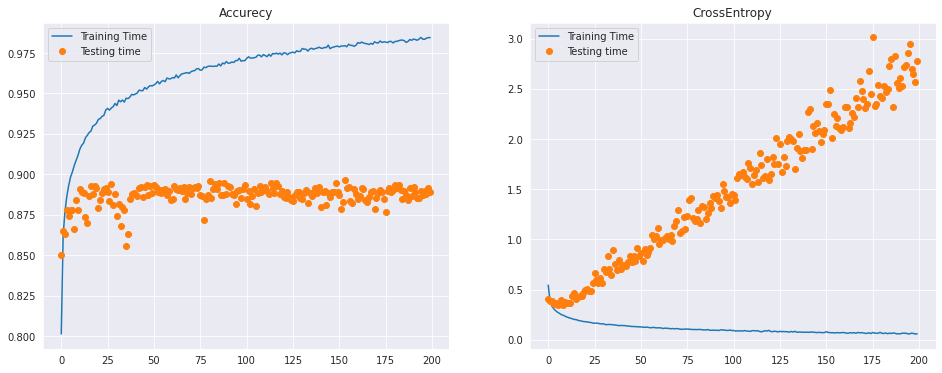

In [65]:
plot_history(his1)

In [66]:
print("Prediction : ",model1.predict_classes(test_data[0:5]))

Prediction :  [9 2 1 1 6]


In [67]:
print("Original Value : ",end = "")
for i in test_label[:5]:
    print(i.argmax() , end = " ")

Original Value : 9 2 1 1 6 

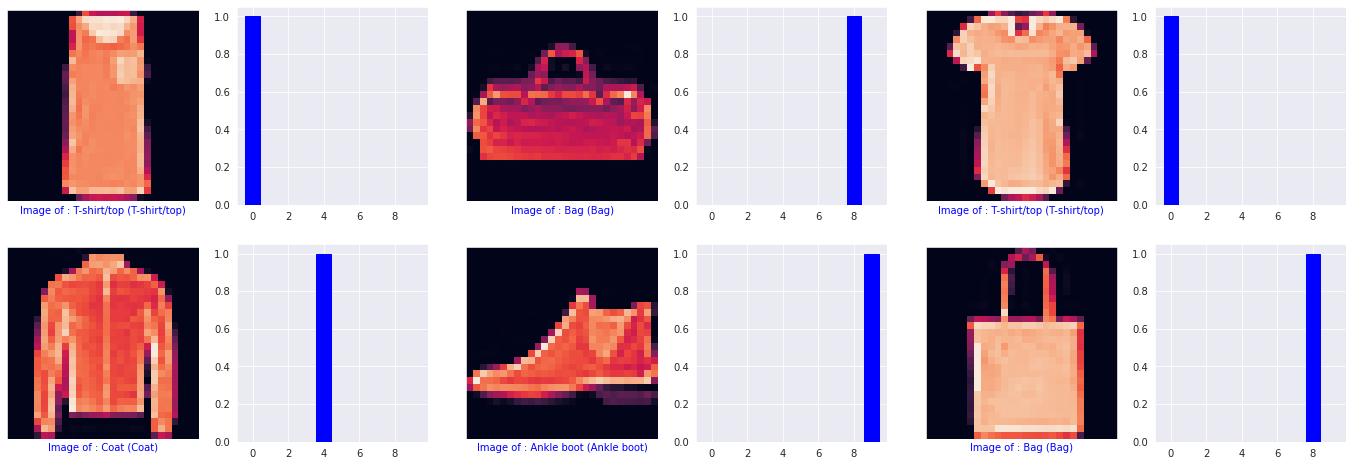

In [69]:
_ , ax = plt.subplots(2,6,figsize = (24,8))
for i in range(2):
    for j in range(3):
        img_index = randint(0,10000)
        img = test_data[img_index , : , :]
        ax[i,j*2].imshow(img)
        predicted_label = model1.predict_classes(img[np.newaxis , :])[0]
        predict_class = class_names[predicted_label]
        true_label = test_label[img_index].argmax()
        true_class = class_names[true_label]
        c = None
        if predict_class == true_class:
            c = "blue"
        else:
            c = "red"
        ax[i,j*2].set_xlabel("Image of : %s (%s)"%( predict_class, true_class ) , color = c)
        ax[i,j*2].grid(False)
        ax[i,j*2].set_xticks([])
        ax[i,j*2].set_yticks([])

        a = ax[i,(j*2 + 1)].bar(range(10) , model1.predict(img[np.newaxis , :])[0] , color = "#777777")
        a[predicted_label].set_color("red")
        a[true_label].set_color("blue")